In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:\\python\\tesla.csv')

# DataSets

In [4]:
df.head()

,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [5]:
df.shape

(2640, 12)

In [6]:
print('The dataset has',df.shape[0],'rows and ',df.shape[1],'columns')

The dataset has 2640 rows and  12 columns


# Datatypes and informations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  2640 non-null   int64  
 1   Month                 2640 non-null   int64  
 2   Region                2640 non-null   object 
 3   Model                 2640 non-null   object 
 4   Estimated_Deliveries  2640 non-null   int64  
 5   Production_Units      2640 non-null   int64  
 6   Avg_Price_USD         2640 non-null   float64
 7   Battery_Capacity_kWh  2640 non-null   int64  
 8   Range_km              2640 non-null   int64  
 9   CO2_Saved_tons        2640 non-null   float64
 10  Source_Type           2640 non-null   object 
 11  Charging_Stations     2640 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 247.6+ KB


we found that datatypes are correct 

# missing values and duplicates

In [11]:
df.isna().sum()

Year                    0
Month                   0
Region                  0
Model                   0
Estimated_Deliveries    0
Production_Units        0
Avg_Price_USD           0
Battery_Capacity_kWh    0
Range_km                0
CO2_Saved_tons          0
Source_Type             0
Charging_Stations       0
dtype: int64

In [12]:
df.duplicated().sum()

0

There is no duplicate and missing values

# Descriptive Statistics

In [15]:
num_df=df.select_dtypes(exclude='object')
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2640.0,2020.000000,3.162877,2015.00,2017.000,2020.000,2023.0000,2025.00
Month,2640.0,6.500000,3.452707,1.00,3.750,6.500,9.2500,12.00
Estimated_Deliveries,2640.0,9922.199621,3935.950093,48.00,7292.000,9857.000,12510.2500,25704.00
Production_Units,2640.0,10655.847348,4260.600858,50.00,7828.250,10546.500,13469.0000,28939.00
Avg_Price_USD,2640.0,84907.340330,20123.258036,50003.70,67726.365,85058.510,102373.0425,119965.36
Battery_Capacity_kWh,2640.0,87.059470,20.836265,60.00,75.000,82.000,100.0000,120.00
Range_km,2640.0,500.257576,120.868549,330.00,418.000,470.000,586.2500,719.00
CO2_Saved_tons,2640.0,744.076989,353.221224,3.07,499.620,699.515,943.7650,2548.55
Charging_Stations,2640.0,8932.133712,3469.565883,3002.00,5897.750,8901.500,11938.0000,14996.00


# checking descripencies

In [17]:
cat_df=df.select_dtypes(include='object')

In [18]:
cat_df.columns

Index(['Region', 'Model', 'Source_Type'], dtype='object')

In [19]:
for i in cat_df.columns:
    print('\n')
    print(df[i].value_counts())



Region
Europe           660
Asia             660
North America    660
Middle East      660
Name: count, dtype: int64


Model
Model S       528
Model X       528
Model 3       528
Model Y       528
Cybertruck    528
Name: count, dtype: int64


Source_Type
Interpolated (Month)    884
Official (Quarter)      884
Estimated (Region)      872
Name: count, dtype: int64


# Outliers

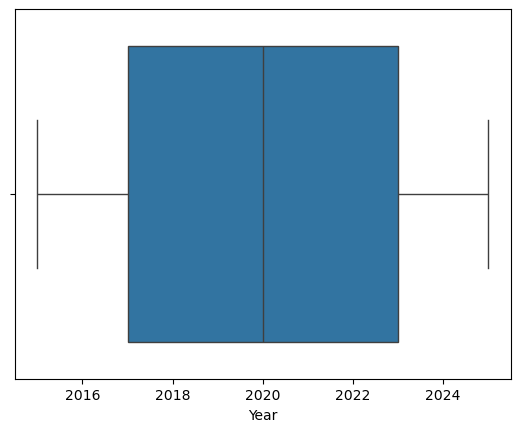

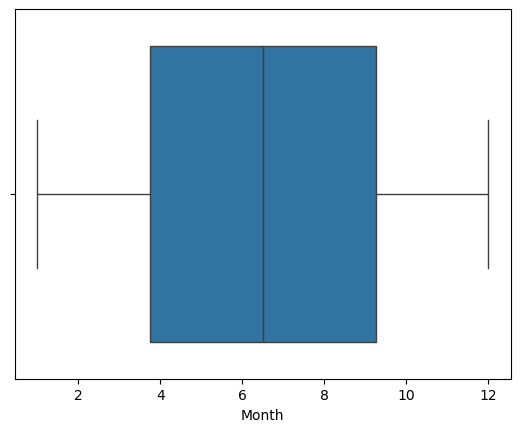

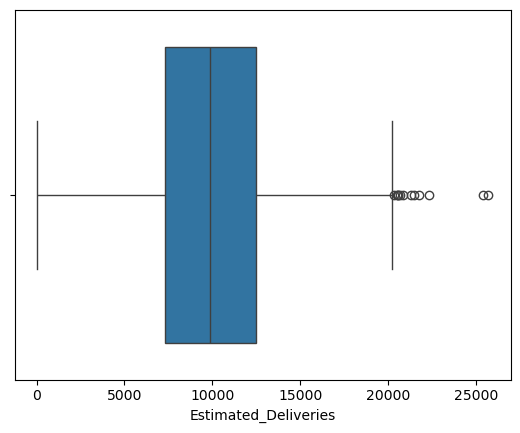

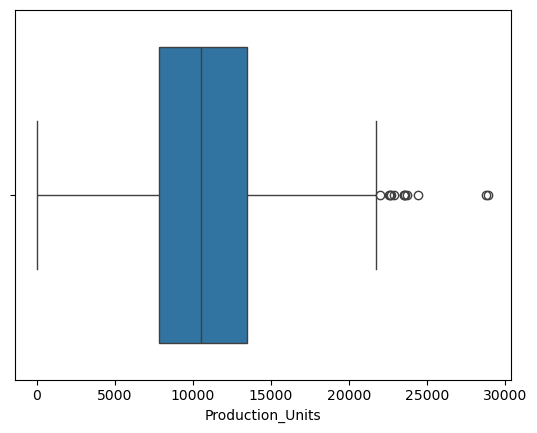

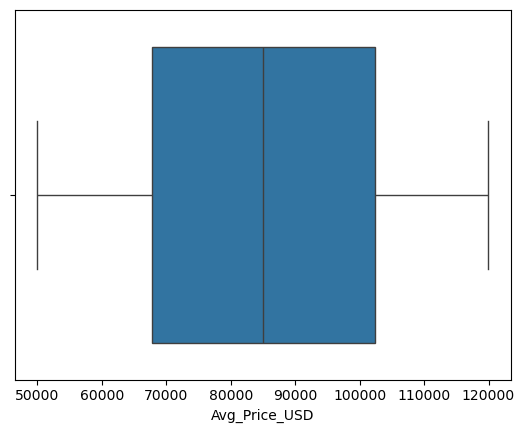

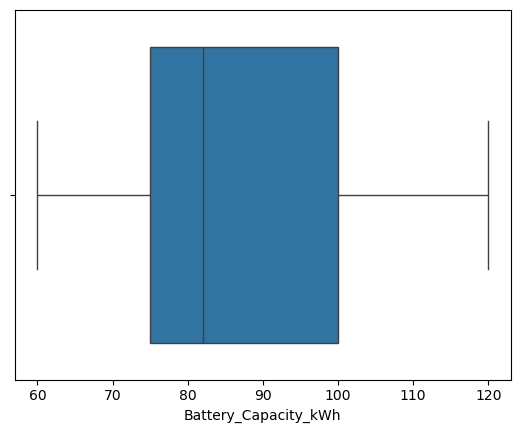

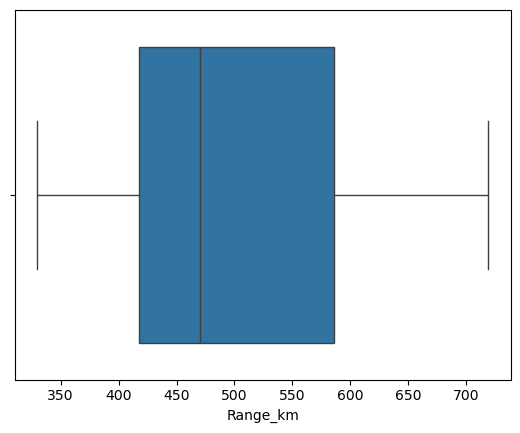

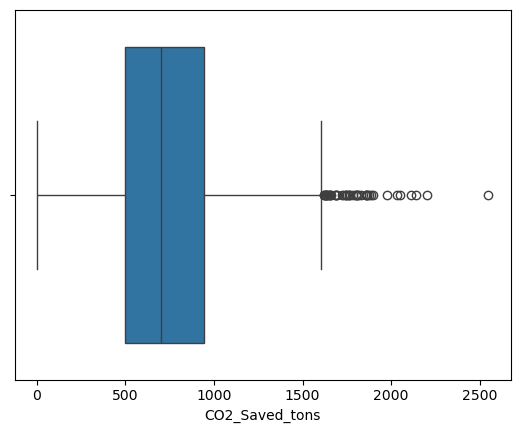

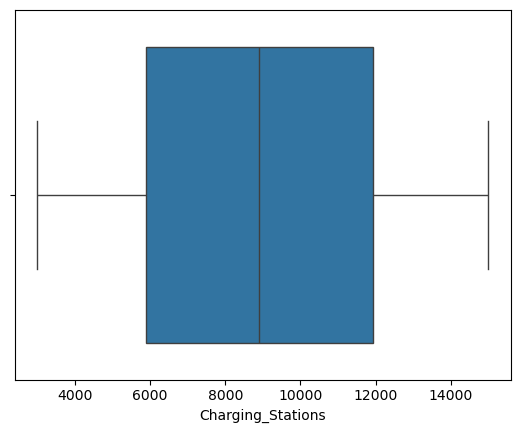

In [21]:
for i in num_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [22]:
num_df.columns


Index(['Year', 'Month', 'Estimated_Deliveries', 'Production_Units',
       'Avg_Price_USD', 'Battery_Capacity_kWh', 'Range_km', 'CO2_Saved_tons',
       'Charging_Stations'],
      dtype='object')

# outlier treatment

In [24]:
for i in ['Estimated_Deliveries','Production_Units','CO2_Saved_tons']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5*iqr
    df[i]=df[i].clip(lower=lc,upper=uc)

# ensuring outlier

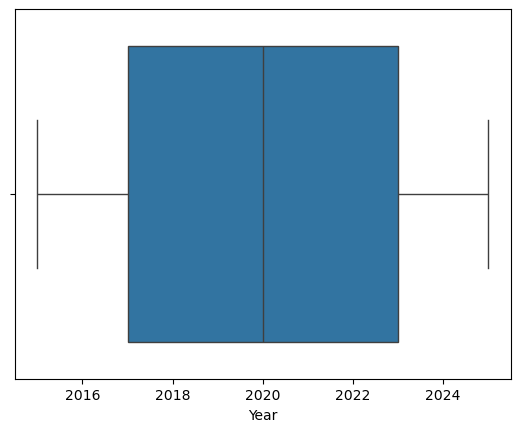

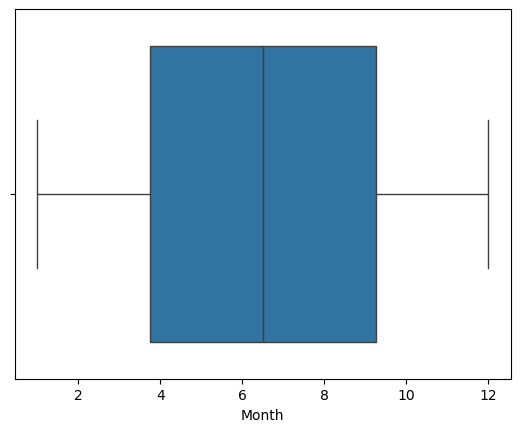

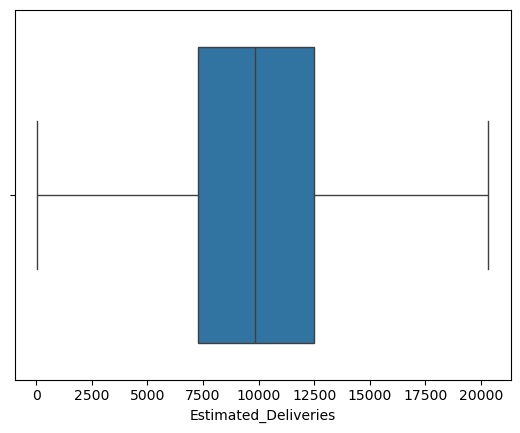

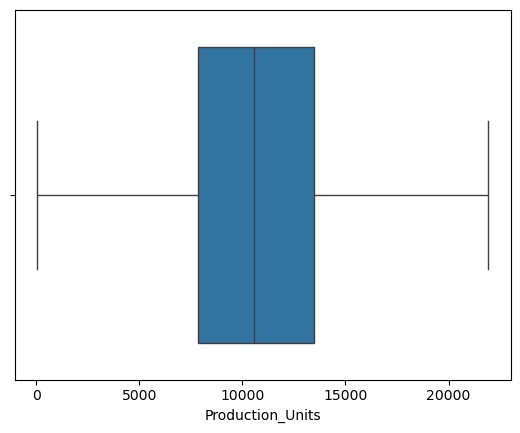

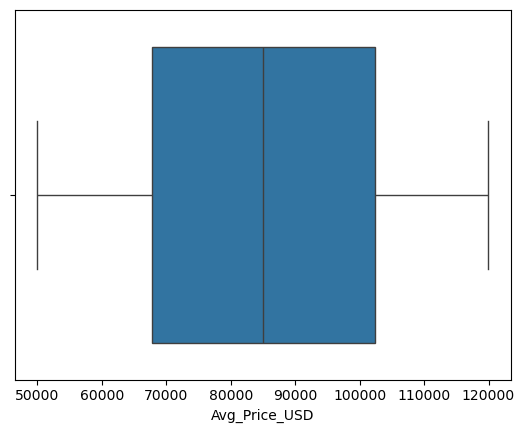

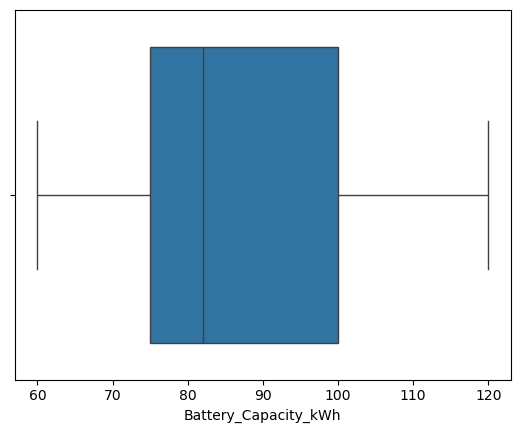

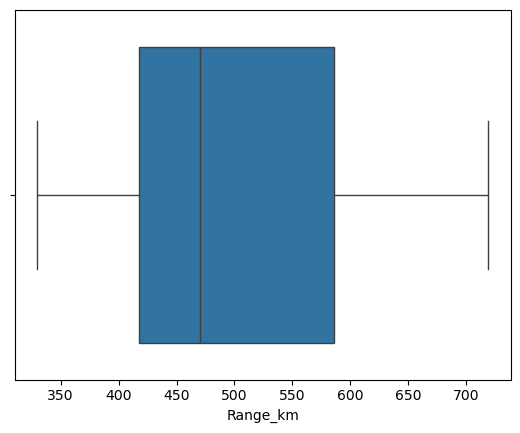

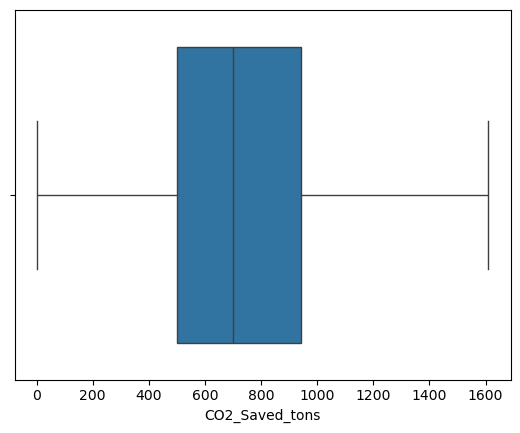

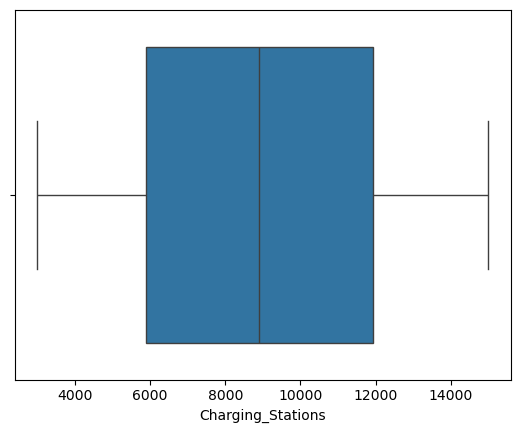

In [26]:
for i in num_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

# visualizations

In [28]:
df.columns

Index(['Year', 'Month', 'Region', 'Model', 'Estimated_Deliveries',
       'Production_Units', 'Avg_Price_USD', 'Battery_Capacity_kWh', 'Range_km',
       'CO2_Saved_tons', 'Source_Type', 'Charging_Stations'],
      dtype='object')

In [29]:
d1=df.groupby(by=['Month'])[['Production_Units']].mean().sort_values(by='Production_Units',ascending=False).reset_index()
d1

,Month,Production_Units
0,8,11254.700000
1,10,10955.714205
2,12,10915.891477
3,7,10756.082386
4,3,10696.177841
5,1,10658.764205
6,11,10607.651705
7,4,10522.227841
8,5,10496.805114
9,9,10469.840909


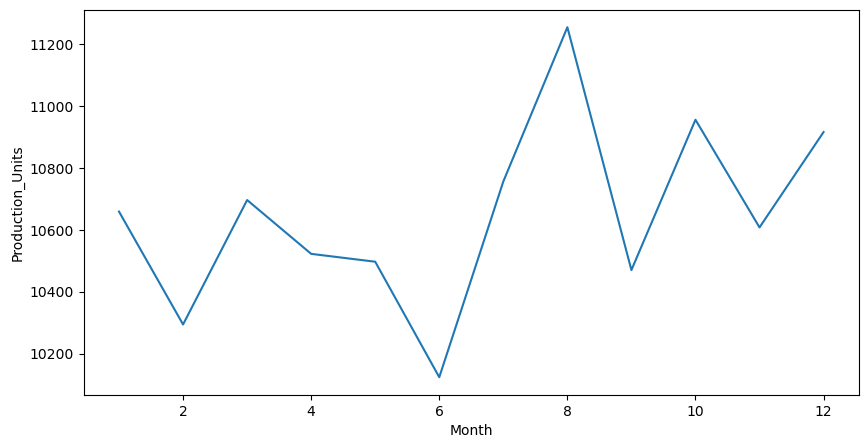

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(data=d1,x='Month',y='Production_Units')
plt.savefig("Month Wise Productions.jpg")
plt.show()

observations:
we found there is high productions in the aug,oct and dec months ,
ver low in the july and feb months

# Recommendations

Provide Cashback Offers

Introduce attractive cashback campaigns specifically during February and July to boost customer demand and production utilization.

Offer First 3 Services Free

New vehicle buyers will feel more confident about long-term maintenance cost, which can increase sales.

Introduce Free Gifts + Extended Battery Warranty

Promotional gifts + longer battery warranty builds customer trust and improves brand reputation among EV buyers.

Reduce Delivery Time

Faster/short-term delivery is very important. Long waiting periods are a major drawback and can affect sales.

Increase Charging Stations

More public and partnership-charging stations will increase convenience and attract more EV buyers—indirectly supporting production growth.

In [33]:
df.columns

Index(['Year', 'Month', 'Region', 'Model', 'Estimated_Deliveries',
       'Production_Units', 'Avg_Price_USD', 'Battery_Capacity_kWh', 'Range_km',
       'CO2_Saved_tons', 'Source_Type', 'Charging_Stations'],
      dtype='object')

In [34]:
d11=df.groupby(by=['Region'])[['Estimated_Deliveries','Production_Units']].mean()
d2=d11.sort_values(by='Estimated_Deliveries',ascending=False).reset_index()
d2['difference']=d2['Production_Units']-d2['Estimated_Deliveries']
d2

,Region,Estimated_Deliveries,Production_Units,difference
0,Middle East,10144.104924,10895.361364,751.256439
1,Asia,9900.944318,10616.388258,715.443939
2,Europe,9834.469886,10574.488447,740.018561
3,North America,9782.827083,10497.547538,714.720455


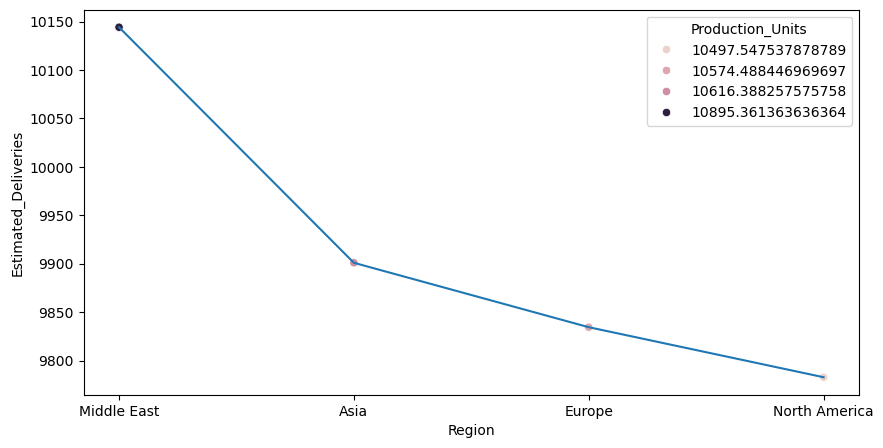

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(data=d2,x='Region',y='Estimated_Deliveries')
sns.scatterplot(data=d2,x='Region',y='Estimated_Deliveries',hue='Production_Units')
plt.savefig("Region Wise Delivery.jpg")
plt.show()

Observations

we have higher delivery in the middle east and europe
low in the asia and north america based on delivery



# Reccomendations
Logistics & Scheduling

Implement a centralized delivery scheduling system to track dispatch, transit, and delivery progress in real time.
Assign delivery slots based on regional demand forecasting and historical delivery performance.

Delivery Team Management

Maintain weekly review meetings with regional delivery managers to track KPIs (delivery time, customer feedback, delays).
Introduce performance-based incentives for delivery staff to increase morale and accountability.

Resource Allocation

Add more delivery personnel and vehicles in Asia & North America to match production output.
Partner with local logistics companies for last-mile delivery efficiency.

Customer Communication
                                      
Enable real-time delivery notifications (SMS / app / WhatsApp).
Create a Self-delivery scheduling option so customers can choose their convenient delivery time.


In [38]:
d12=df.groupby(by=['Year']).agg(total_productions=('Production_Units',np.sum),no_of_charging_stations=('Charging_Stations',np.sum))
d3=d12.sort_values(by=['Year'],ascending=True).reset_index()
d3['yoy']=d3['total_productions'].pct_change()*100
d3['yoy']=d3['yoy'].fillna(0)
d3

,Year,total_productions,no_of_charging_stations,yoy
0,2015,2537416.375,2224563,0.000000
1,2016,2617000.000,2140661,3.136404
2,2017,2520075.125,2076855,-3.703664
3,2018,2595958.125,2100018,3.011140
4,2019,2573522.000,2164314,-0.864271
5,2020,2462161.125,2127221,-4.327178
6,2021,2504477.250,2138332,1.718658
7,2022,2610189.500,2153298,4.220931
8,2023,2562319.000,2184161,-1.833986
9,2024,2587664.000,2174451,0.989143


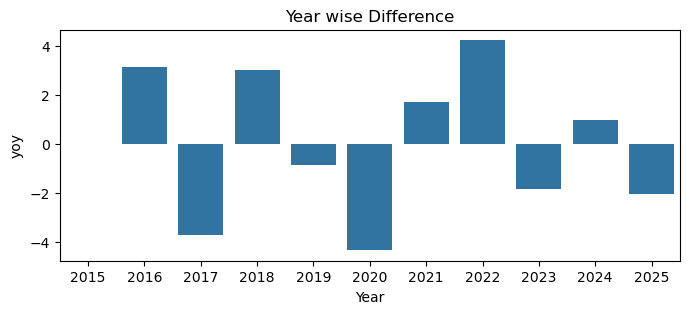

In [39]:
plt.figure(figsize=(8,3))
sns.barplot(data=d3,x='Year',y='yoy')
plt.title("Year wise Difference")
plt.savefig("Year-over-year Difference.jpg")
plt.show()

observations

The production trend shows alternating growth and decline almost every year.
Years with decline in charging stations usually match with production drop years.

# Recommendations

Increase the number of charging stations, especially in high-demand cities and highways,
Ensure uninterrupted electricity supply & backup solar/EV storage support,
Use IoT devices in charging stations to track usage, faults, outages, service requests,
Tie up with malls, parking areas, fuel stations, offices for public charging space,
Apply for subsidies and EV infrastructure grants for cost reduction.

In [42]:
d13=df.groupby(by=['Battery_Capacity_kWh']).agg(Range_km=('Range_km',np.mean),Total_productions=('Production_Units',np.mean))
d4=d13.reset_index()
d4

,Battery_Capacity_kWh,Range_km,Total_productions
0,60,344.014652,10707.074863
1,75,430.175238,10494.771429
2,82,471.569316,10681.135397
3,100,575.666667,10813.271457
4,120,689.711575,10538.021584


Observations:

100 kWh variant → long range (576 km) suitable for frequent long-distance drivers.
60 kWh variant → moderate range (344 km) ideal for local / daily city users.
75 kWh & 82 kWh variants — ranges (430–472 km) are not significantly different,
but production volume is still lower compared to 60 kWh and 100 kWh.


# Recommendations:

Focus production on 60 kWh and 100 kWh, as they are the highest-demand segments.
Reduce or discontinue 75 kWh and 82 kWh variants because:
Similar range difference does not justify price increase.
Production volume is low, leading to manufacturing complexity without profit advantage.

Improve Charging Advantages:
Highlight charging time savings for 60 kWh buyers in marketing campaigns.
Promote long-range travel confidence for 100 kWh buyers with features like:
battery health monitoring
long-drive mode
charging location assistance on map

Pricing Strategy
Create clear value separation between 60 kWh and 100 kWh:
60 kWh → affordable, budget-friendly EV
100 kWh → premium long-range model
